In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns

In [2]:
# 1. Import dataset and display first 5 rows
df=pd.read_csv('tvmarketing.csv')
print(df.head(5))

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [4]:
# 2. Check column data types
df.dtypes

TV       float64
Sales    float64
dtype: object

In [5]:
# 3. Check the shape of the Data Frame (rows, columns)
rows,cols=df.shape
print(f"rowsXcols:{rows}X{cols}")

rowsXcols:200X2


In [6]:
# 4. Look at summary statistics
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


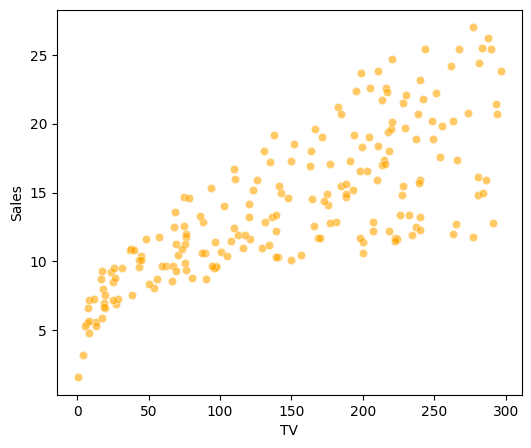

In [16]:
# 5. Visualize the relationship between the features('tv' here ) and the dependent variable('sales depend on tv') using scatterplots
plt.figure(figsize=(6,5))
sns.scatterplot(x=df['TV'],y=df['Sales'],color='orange',alpha=0.6)
plt.show()

In [17]:
# 6. Prepare X (feature variables) and y (response variable)
x=df[['TV']]
y=df['Sales']


In [21]:
# 7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)
print(x_train.shape)#70% of 200
print(x_test.shape)#30% of 200

(140, 1)
(60, 1)


In [27]:
# 9. Perform Linear Regression (on train data) without using any library and print the coefficients values
x_train_np=x_train.values.flatten()
y_train_np=y_train.values
mean_x=np.mean(x_train_np)
mean_y=np.mean(y_train_np)
numerator=np.sum((x_train_np-mean_x)*(y_train_np-mean_y))
denominator=np.sum((x_train_np-mean_x)**2)   
b1=numerator/denominator #b1=summation{(Xi-Xbar)*(Yi-Ybar)}/summation{(Xi-Xbar)**2}
#y=bo+b1x -->y=mx+c  
#b0=mean_y-b1*mean_x
b0=mean_y-b1*mean_x
print("without using any library and print the coefficients values")
print("slope:",b1)
print("coefficient:",b0)



without using any library and print the coefficients values
slope: 0.04640780212815278
coefficient: 7.2394598307511355


In [36]:
# 10.Create the model using the calculated coefficients and make predictions on the testing set
y_pred_man=b0+b1*x_test
print(y_pred_man[:5])

            TV
95   14.817854
15   16.307544
30   20.832305
158   7.782431
128  17.463099


In [37]:
## 11.Perform Linear Regression using library(sklearn)
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(x_train,y_train)

LinearRegression()

In [60]:
# 12.Print the intercept and coefficients
print("coeff/slope of Tv:",l.coef_[0])
print("intercept:",l.intercept_)

coeff/slope of Tv: 0.046407802128152764
intercept: 7.239459830751138


In [41]:
# Predict sales for the test set
y_pred=l.predict(x_test)
# Display first few predictions
print(y_pred[:6])

[14.81785392 16.30754437 20.83230507  7.78243112 17.46309864 10.72468577]


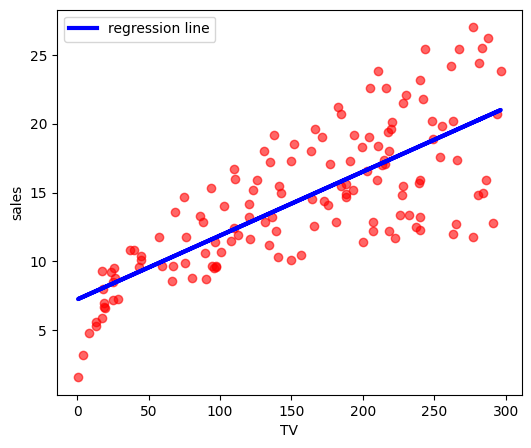

In [45]:
# 14.Plot train data and the model

# using pyplot

plt.figure(figsize=(6,5))
plt.scatter(x_train,y_train,color='red',alpha=0.6)
plt.plot(x_train,l.predict(x_train),color='blue',linewidth=3,label="regression line")
plt.xlabel('TV')
plt.ylabel('sales')
plt.legend()
plt.show()

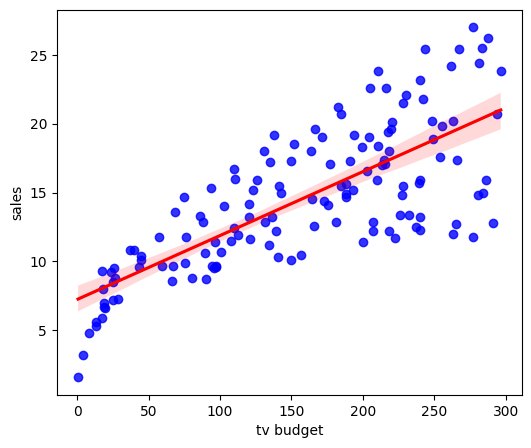

In [48]:
# 14.Plot train data and the model

# using seaborn

import seaborn as sns
plt.figure(figsize=(6,5))
sns.regplot(x=x_train,y=y_train,scatter_kws={"color":"blue"},line_kws={"color":"red"})
plt.xlabel("tv budget")
plt.ylabel("sales")
plt.show()

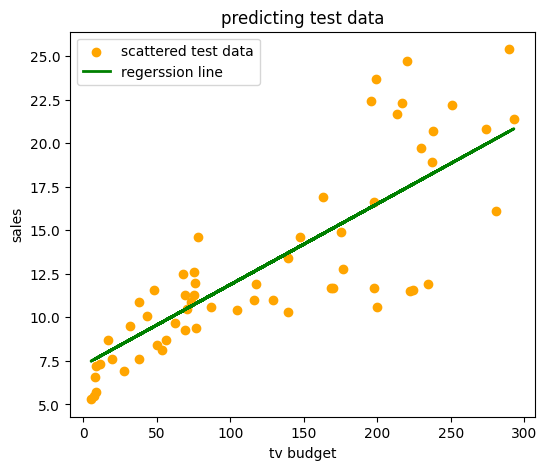

In [52]:
# 15.Plot test data and the model

# using pyplot

plt.figure(figsize=(6,5))
plt.scatter(x_test,y_test,color='orange',label='scattered test data')
plt.plot(x_test,l.predict(x_test),color='green',linewidth=2,label='regerssion line')
plt.title('predicting test data')
plt.xlabel('tv budget')
plt.ylabel('sales')
plt.legend()
plt.show()

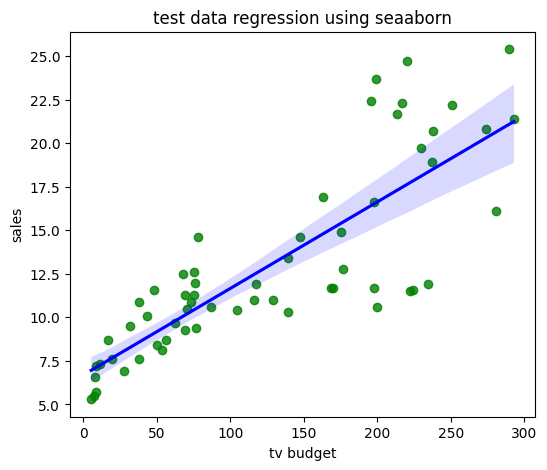

In [54]:
# 15.Plot test data and the model

# using seaborn
plt.figure(figsize=(6,5))
sns.regplot(x=x_test,y=y_test,scatter_kws={'color':'green'},line_kws={'color':'blue'})
plt.title('test data regression using seaaborn')
plt.xlabel('tv budget')
plt.ylabel('sales')
plt.show()

In [57]:
# 16.Print Mean Squared Error and R Squared Valu
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean squared error:",mse)
print("r2 score :",r2)

mean squared error: 8.970991242413614
r2 score : 0.6714477229302764


In [59]:
# 17.Calculate and print R Squared and Adjusted R Squared values without any library

# Convert test data and predictions to numpy arrays (if not already)
y_test_np=y_test.values
n=len(y_test_np)
p=1
ss_total=np.sum((y_test_np-np.mean(y_test_np))**2)
ss_res=np.sum((y_test_np-y_pred)**2)
r_squared_manual=1-(ss_res/ss_total)
adjusted_r_squared=1-(1-r_squared_manual)*(n-1)/(n-p-1)
print("\nManual Evaluation:")
print("Manual R Squared:", r_squared_manual)
print("Manual Adjusted R Squared:", adjusted_r_squared)


Manual Evaluation:
Manual R Squared: 0.6714477229302764
Manual Adjusted R Squared: 0.6657830284980398
